## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [138]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [139]:
# Reading data from file and viewing it.
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [140]:
# Determining number of rows in dataset.
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [141]:
# Determining number of unique users in dataset.
total_users = df['user_id'].nunique()
total_users

290584

d. The proportion of users converted.

In [142]:
# Calculating proportion of users in dataset that converted.
converted = df.query('converted == "1"').count()['user_id']
proportion_user_converted = 100 * (converted/float(total_users))
proportion_user_converted

12.126269856564711

e. The number of times the `new_page` and `treatment` don't line up.

In [143]:
# Calculating no of times landing_page and group dont match in dataset.
dont_line_up1 = df.query('landing_page == "new_page" & group != "treatment"').count()['user_id']
dont_line_up2 = df.query('landing_page != "new_page" & group == "treatment"').count()['user_id']
total_dont_line_up = dont_line_up1 + dont_line_up2
total_dont_line_up

3893

f. Do any of the rows have missing values?

In [144]:
# Finding missing values in any row.
df.isnull().values.any()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [145]:
# Creating a new dataset without the rows where landing_page and group do not align.
df.set_index('user_id')
df.drop(df.query('landing_page == "new_page" & group != "treatment"')['user_id'].index, inplace = True)
df.drop(df.query('landing_page != "new_page" & group == "treatment"')['user_id'].index, inplace = True)
df2 = df
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [146]:
# Double Checking to ensure all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [147]:
# Calculating unique user_ids in df2.
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [148]:
# Finding dupes in df2.
dupes = df2[df2['user_id'].duplicated()]
dupes

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [149]:
# Finding row information for user id with dupes
df2.query('user_id =="773192"')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [150]:
# Removing duplicate row for user id with dupes
df2.drop([2893], inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [151]:
# Calculating count for converted users and total users.
converted = df2.query('converted == "1"').count()['user_id']
total_users = df2['user_id'].nunique()

# Calculating proportion for converted users
proportion_converted = converted/float(total_users)
proportion_converted

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [152]:
# Calculating count for converted users and total users in control group.
user_control = df2.query('group == "control"').count()['user_id']
converted_control = df2.query('group == "control" and converted == "1"').count()['user_id']

# Calculating proportion for converted users in control group
proportion_converted_control = converted_control/float(user_control)
proportion_converted_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [153]:
# Calculating count for converted users and total users in treatment group.
user_treatment = df2.query('group == "treatment"').count()['user_id']
converted_treatment = df2.query('group == "treatment" and converted == "1"').count()['user_id']

# Calculating proportion for converted users in treatment group
proportion_converted_treatment = converted_treatment/float(user_treatment)
proportion_converted_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [154]:
# Calculating count for users that receive new page and total users in treatment group.
users_new_page = df2.query('landing_page == "new_page"').nunique()['user_id']
total_users = df2['user_id'].nunique()

# Calculating proportion for users that received new page.
proportion_new_page = users_new_page/float(total_users)
proportion_new_page

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

Based on the above results, there is not sufficient evidence to say that the new treatment page leads to more conversions. 
<br> We do observe that the probability of people converting in the control group is slightly greater than those in the treatment group. However this cannot alone prove that the new page does not ensure more people convert.</br>


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null Hypothesis: Pnew <= Pold 
<br> Alternative Hypothesis: Pnew > Pold </br>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

A. What is the **convert rate** for $p_{new}$ under the null? <br><br>

In [155]:
# Calculating convert rate for p-new under the null
new_page = df2.query('converted == "1"').nunique()['user_id']
Pnew = new_page/float(df2['user_id'].nunique())
Pnew

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [156]:
# Calculating convert rate for p-old under the null
old_page = df2.query('converted == "1"').count()['user_id']
Pold = old_page/float(df2['user_id'].nunique())
Pold

0.11959708724499628

c. What is $n_{new}$?

In [157]:
# Calculating number of users receiving new page
Nnew = df2.query('group == "treatment"').nunique()['user_id']
Nnew

145310

d. What is $n_{old}$?

In [158]:
# Calculating number of users receiving old page
Nold = df2.query('group == "control"').nunique()['user_id']
Nold

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [159]:
# Simulating n-new transaction with convert rate p-new and obtaining mean for it
new_page_converted = np.random.choice([0,1],size = Nnew, p = [0.8804,0.1196])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [160]:
# Simulating n-old transaction with convert rate p-old and obtaining mean for it
old_page_converted = np.random.choice([0,1],size = Nold, p = [0.8804,0.1196])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [161]:
# Since new_page_converted and old_page_converted is not same, we cannot directly compute the difference. 
# So we truncate new page converted for the excess values.
new_page_converted = new_page_converted[:145274]

#Finding p-new - p-old
diff = new_page_converted.mean() - old_page_converted.mean()
diff

-0.0011013670718779678

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [162]:
#Simulating 10,000 p-new - p-old values and storing them in p-diffs
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0,1],size = Nold, p = [0.8804,0.1196])
    npm = new_page_converted.mean()
    old_page_converted = np.random.choice([0,1],size = Nold, p = [0.8804,0.1196])
    opm = old_page_converted.mean()
    p_diffs.append(npm - opm)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

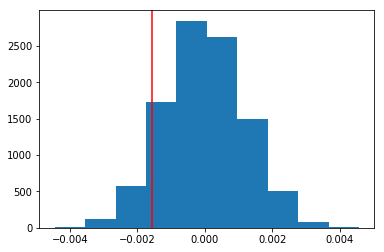

In [163]:
#Plotting histogram for p-diffs
plt.hist(p_diffs)
plt.axvline(actual_observed_value, color="red")

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [164]:
# Calculating actual observed difference
actual_observed_value = proportion_converted_treatment - proportion_converted_control
actual_observed_value

-0.0015782389853555567

In [165]:
# Calculating the p-value
(p_diffs > actual_observed_value).mean()

0.9097

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

We computed the probability of finding the observed value, or more extreme in favour of the alternative, if the null hypothesis is true. This value is called p-value in scientific studies. 

When the p-value is greater than the type 1 error rate, we fail to reject the null hypothesis. For our case study, our Type 1 error rate = 0.05. Since, P-value is greater than Type 1 error rate, we fail to reject the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [166]:
#Importing the statsmodel library
import statsmodels.api as sm

# Calculating no if users who converted for old and new pages as well as no of rows associated with old and new pages
convert_old = df2.query('group == "control" and converted == "1"').nunique()['user_id']
convert_new = df2.query('group == "treatment" and converted == "1"').nunique()['user_id']
n_old = df2.query('group == "control"').nunique()['user_id']
n_new = df2.query('group == "treatment"').nunique()['user_id']

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [167]:
# Using the built in z-test function to calculate the p-value and z-score.
stat, pval = sm.stats.proportions_ztest([convert_new,convert_old],[n_new,n_old],
                                        alternative = 'larger')
print (pval)
print (stat)

0.9050583127590245
-1.3109241984234394


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The z-score and p-value computed in the previous question agree with our findings in part j. and k. that we fail to reject the null hypothesis.


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [168]:
# Adding intercept
df2['intercept'] = 1

# Adding dummy column
df2['ab_page'] = np.where(df2['group'] == "treatment", 1, 0)
df2.head()


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [169]:
import statsmodels.api as sm

#Instantiation and fitting the model
logit_m = sm.Logit(df['converted'],df[['intercept','ab_page']])
results = logit_m.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [170]:
# Getting statistical summary.
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2019-05-08 12:54 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

From the above summary, we dont have statistically proof that people who receive the new page or are in the treatment group converted more that those who receive the old page or are in the control group. The p-value for the ab_page column is greater than our alpha, which means it is not statistically significant.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value associated with ab_page is 0.1899. This value differs from the value found in Part II because our null and alternative hypothesis differe from Part II. 

In part II, we conduct a one tailed hypothesis test where we allot all of our alpha to testing in one direction. 

In Regression analysis, we conduct a two tailed hypothesis test where the alpha is split two parts and used to test in both directions. Hence the p-values differ.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Adding other factors to a regression model help us tailor it to become more specific and more accurate. When considering adding different factors to a regression model, we can test out different factors and then choose factors which have statistically significant p-value to add to our model.

The disadvantage of adding additional terms to our model is that are model might become overspecified and might tend to have less accurate estimates. We need to decide which factors to consider based on what we are trying to determine through our model.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [171]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
653118,US,2017-01-09 03:12:31.034796,control,old_page,0,1,0
878226,UK,2017-01-05 15:02:50.334962,control,old_page,0,1,0
799368,UK,2017-01-09 18:07:34.253935,control,old_page,0,1,0
655535,CA,2017-01-09 13:30:47.524512,treatment,new_page,0,1,1
934996,UK,2017-01-09 00:30:08.377677,control,old_page,0,1,0


In [172]:
# Create the necessary dummy variables
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])
df_new.drop(['CA'], axis = 1)

# Instantiate and fit the model and summarize our results.
logit_m = sm.Logit(df_new['converted'],df_new[['intercept','US','UK']])
results = logit_m.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2019-05-08 12:54 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
==================================================================

"""

From the above statistical summary, it appears that the country of the user does not have an impact on the conversion since p-values for both countries is below our error rate of 0.05.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [173]:
# Creating our new interaction terms
df_new['US_Page'] = df_new['US']*df_new['ab_page']
df_new['UK_Page'] = df_new['UK']*df_new['ab_page']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,US_Page,UK_Page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1


In [174]:
#Fitting the model and summarizing our results
logit_m = sm.Logit(df_new['converted'],df_new[['intercept','US','UK','ab_page','US_Page','UK_Page']])
results = logit_m.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2019-05-08 12:55 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US_Page        0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
UK_Page        0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

After having added interaction terms for page and country to our model,  we dont see any significant effect of the two variables together on conversion. All the p-values for the lower order terms as well as interaction terms are greater than the error rate.

<a id='conclusions'></a>
## Conclusions

We can conclude based on the statistical evidence we have gathered that in this case, we fail to reject the null hypothesis and we dont have enough evidence that new page performs better in terms of user conversion as compared to the old page. My advice to the company would be not to implement the new page just yet.

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.